# Initial Data Processing

In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
from pprint import pprint
import seaborn as sn 
import pandas as pd
import numpy as np
import requests
import random
import re

movies = ["tt0381061", "tt0482571", "tt1232829", "tt1853728", "tt0993846", "tt0314331", "tt0362227", "tt0446029", "tt1631867","tt0841032",
"tt0266543",
"tt0371746",
"tt1219827",
"tt0317919",
"tt0373889",
"tt0488120",
"tt0414993",
"tt0325980",
"tt0367882",
"tt0337978",
"tt0371746",
"tt0482571",
"tt0417741",
"tt0253474",
"tt0362227",
"tt0480249",
"tt0328107",
"tt0383574",
"tt0414055",
"tt0458481",
"tt0338013",
"tt0286716",
"tt0253474",
"tt0362227",
"tt0417741",
"tt0371746",
"tt0482571",
"tt0327056",
"tt0266543",
"tt0465234",
"tt0246578",
"tt0372784",
"tt0496806",
"tt0325980",
"tt0264464",
"tt0405422",
"tt0480249",
"tt0414852",
"tt0330373",
"tt0365748",
"tt0363163",
"tt0417741",
"tt0332452",
"tt0278504",
"tt0480249",
"tt0372183",
"tt0289879",
"tt0422295",
"tt0382932",
"tt0449088",
"tt0371746",
"tt0405422",
"tt1210819",
"tt0780653",
"tt0413300",
"tt0816692",
"tt0329691",
"tt0417741",
"tt0482571",
"tt0338013",
"tt0325980",
"tt0413300",
"tt0482571",
"tt0371246",
"tt0245429",
"tt0363163",
"tt0330373",
"tt0399295",
"tt0467406",
"tt0425210",
"tt0371746",
"tt1232829",
"tt0399295",
"tt0489099",
"tt0362227",
"tt0328107",
"tt0405422",
"tt0299930",
"tt0417741",
"tt0275847",
"tt0330373",
"tt0241527",
"tt0379786",
"tt0480249",
"tt0289879",
"tt0362227",
"tt0411008",
"tt0397313",
"tt0295297",
"tt0275847",
"tt0347149",
"tt0477348",
"tt0259711",
"tt0405508",
"tt0371746",
"tt0286716",
"tt0486655",
"tt0362227",
"tt0328107",
"tt0249462",
"tt0245429",
"tt0371746",
"tt0289879",
"tt0322259",
"tt0259711",
"tt0290334",
"tt0333766",
"tt0265086",
"tt0388795",
"tt0362227",
"tt0245429",
"tt0482571",
"tt0362165",
"tt0298148",
"tt0414993",
"tt0381707",
"tt0373889",
"tt0328107",
"tt0478087",
"tt0448124",
"tt0266543",
"tt0371746",
"tt0405422",
"tt0482571",
"tt0848228",
"tt1232829",
"tt1528100",
"tt1895587",
"tt2076822",
"tt2278388",
"tt0266543",
"tt0361862",
"tt0405159",
"tt0482571",
"tt0498399",
"tt0770828",
"tt0905372",
"tt1170358",
"tt1216475",
"tt1838556",
"tt0289879",
"tt0499448",
"tt0325710",
"tt0413267",
"tt0362478",
"tt0482571",
"tt0332452",
"tt0448124",
"tt0401855",
"tt0373889",
"tt0313542",
"tt0277296",
"tt0259324",
"tt0372784",
"tt0382932",
"tt0246578",
"tt0405422",
"tt0338013",
"tt0246578",
"tt0322259",
"tt0338013",
"tt0299977",
"tt0413300",
"tt0482571",
"tt0363771",
"tt0383574",
"tt0258463",
"tt0327056",
"tt0371746",
"tt0429589",
"tt0371746",
"tt0246578",
"tt1219289",
"tt0383574",
"tt0405422",
"tt0413300",
"tt0314331",
"tt0480249",
"tt0417741",
"tt0264464",
"tt0278504",
"tt0482571",
"tt0371746",
"tt0332452",
"tt0241527",
"tt0372784",
"tt0362227",
"tt0405508",
"tt0448134",
"tt0462396",
"tt0338751",
"tt0405422",
"tt0417433",
"tt0251127",
"tt0278487",
"tt0315327",
"tt0381849",
"tt0351283",
"tt0414993",
"tt0284137",
"tt0375679",
"tt0446755",
"tt0265208",
"tt0434409",
"tt0266452",
"tt0329774",
"tt0361748",
"tt0414982",
"tt0382932",
"tt0272736",
"tt0364725",
"tt0289879",
"tt0357110",
"tt0422720",
"tt0359013",
"tt0349467",
"tt0289879",
"tt0382625",
"tt0338013",
"tt0366780",
"tt0389790",
"tt0317219",
"tt0356634",
"tt0425210",
"tt0348333",
"tt0382625",
"tt0410377",
"tt0303933",
"tt0449487",
"tt0327850",
"tt0317648",
"tt0359950",
"tt0382077",
"tt0325123",
"tt0274558",
"tt0295701",
"tt0339291",
"tt0405422",
"tt0352994",
"tt0270846",
"tt0313443",
"tt0417741",
"tt0356910",
"tt0457430",
"tt0409182",
"tt0382625",
"tt0368709",
"tt0396171",
"tt0374546",
"tt0281358",
"tt0416236",
"tt0327056",
"tt0449010",
"tt0295701",
"tt0379865",
"tt0289043",
"tt0375154",
"tt0381061",
"tt0338751",
"tt0372183",
"tt0356634",
"tt0365748",
"tt0358273",
"tt0362120",
"tt0401445",
"tt0402910",
"tt0337563",
"tt0349710",
"tt0348836",
"tt0362226",
"tt0315327",
"tt0338526",
"tt0382932",
"tt0385267",
"tt0360201",
"tt0351283",
"tt0317919",
"tt0327056",
"tt0381849",
"tt0327056",
"tt0381849",
"tt0360201",
"tt0351283",
"tt0317919",
"tt0385267",
"tt0362226",
"tt0348836",
"tt0349710",
"tt0278504",
"tt0482571",
"tt0371746",
"tt0332452",
"tt0241527",
"tt0372784",
"tt0362227",
"tt0405508",
"tt0448134",
"tt0462396",
"tt0413300",
"tt0295297",
"tt0389860",
"tt0311113",
"tt0375679",
"tt0259711",
"tt0357413",
"tt0362226",
"tt0250224",
"tt0343660",
"tt0377981",
"tt0304141",
"tt0326977",
"tt0268126",
"tt0343663",
"tt0361862",
"tt0364569",
"tt0312004",
"tt0319061",
"tt0360486",
"tt0328107",
"tt0365737",
"tt0351283",
"tt0356910",
"tt0377592",
"tt0361748",
"tt0356618",
"tt0383010",
"tt0375568",
"tt0398165",
"tt0316654",
"tt0307987",
"tt0359950",
"tt0300532",
"tt0309530",
"tt0357277",
"tt0347246",
"tt0364961",
"tt0351284",
"tt0357419",
"tt0241527",
"tt0362227",
"tt0372784",
"tt0278504",
"tt0482571",
"tt0405508",
"tt0332452",
"tt0371746",
"tt0462396",
"tt0448134",
"tt0381061",
"tt0245429",
"tt0425112",
"tt0317219",
"tt0405422",
"tt0375679",
"tt0319262",
"tt0325703",
"tt0465665",
"tt0418279",
"tt0413300",
"tt0414887",
"tt0289879",
"tt0332379",
"tt0362165",
"tt0283111",
"tt0251127",
"tt0382625",
"tt0338013",
"tt0364569",
"tt0308644",
"tt0309530",
"tt0289879",
"tt0375611",
"tt0327056",
"tt0311113",
"tt0401792",
"tt0360717",
"tt0427229",
"tt0358082",
"tt0314498",
"tt0358273",
"tt0404030",
"tt0332379",
"tt0351283",
"tt0290334",
"tt0275847",
"tt0408839",
"tt0317740",
"tt0417741",
"tt0278504",
"tt0482571",
"tt0371746",
"tt0332452",
"tt0241527",
"tt0372784",
"tt0362227",
"tt0405508",
"tt0448134",
"tt0462396",
"tt0357110",
"tt0405422",
"tt0413300",
"tt0318462",
"tt0373926",
"tt0367110",
"tt0338751",
"tt0275847",
"tt0242653",
"tt0279331",
"tt0289879",
"tt0414055",
"tt0421715",
"tt0327056",
"tt0366780",
"tt0343660",
"tt0265208",
"tt0327054",
"tt0329101",
"tt0332379",
"tt0293564",
"tt0373074",
"tt0343737",
"tt0338077",
"tt0368259",
"tt0351283",
"tt0352994",
"tt0368578",
"tt0356618",
"tt0358082",
"tt0361862",
"tt0367594",
"tt0362165",
"tt0359950",
"tt0360120",
"tt0357277",
"tt0362270",
"tt0360323",
"tt0364970",
"tt0366548",
"tt0259711",
"tt0313443",
"tt0327056",
"tt0372183",
"tt0382932",
"tt0413300",
"tt0457400",
"tt0460681",
"tt0498380",
"tt0507275",
"tt0829482",
"tt0905371",
"tt0995039",
"tt1049413",
"tt1100119",
"tt1204975",
"tt1220719",
"tt1282140",
"tt1333125",
"tt1371150",
"tt1438254",
"tt1535109",
"tt1623288",
"tt1702425",
"tt1790809",
"tt1854564",
"tt1877832",
"tt1951261",
"tt2011971",
"tt2083355",
"tt2139555",
"tt2184339",
"tt2278871",
"tt2347134",
"tt2395427",
"tt2431286",
"tt2488496",
"tt2547584",
"tt2582846",
"tt2652118",
"tt2724064",
"tt2832470",
"tt2908446",
"tt2975578",
"tt3028416",
"tt3099498",
"tt3183660",
"tt3259178",
"tt3316620",
"tt3405236",
"tt0286716",
"tt0367089",
"tt0413300",
"tt0246578",
"tt0374900",
"tt0316654",
"tt0268978",
"tt0407304",
"tt0324126",
"tt0372183",
"tt0360009",
"tt0384642",
"tt0383574",
"tt0357110",
"tt0264464",
"tt0369339",
"tt0343660",
"tt0416320",
"tt0335345",
"tt0246460",
"tt0361841",
"tt0293662",
"tt0317648",
"tt0396269",
"tt0272338",
"tt0359950",
"tt0349683",
"tt0371257",
"tt0328107",
"tt0298814",
"tt0319343",
"tt0368709",
"tt0360201",
"tt0360556",
"tt0337563",
"tt0305711",
"tt0314067",
"tt0312843",
"tt0298130",
"tt0316654",
"tt0353969",
"tt0358082",
"tt0403358",
"tt0303816",
"tt0377981",
"tt0330793",
"tt0308644",
"tt0368891",
"tt0332379",
"tt0314331"]
movie_data = []

url = "https://movie-database-alternative.p.rapidapi.com/"

headers = {
    "X-RapidAPI-Key": "38565ed214msh308e11f3b916074p16b6fcjsn9b77ef6aeb70",
    "X-RapidAPI-Host": "movie-database-alternative.p.rapidapi.com"
}

for movie in movies:
    querystring = {"r":"json","i":movie}

    try:
        response = requests.get(url, headers=headers, params=querystring).json()

        id = movie
        title = response['Title']
        year = response['Year']
        awards_rough = response['Awards']
        ratings_rough = response['Ratings']

        print(title)

        box_office = response['BoxOffice']
        box_office = box_office.replace("$", "")
        box_office = box_office.replace(",", "")
        box_office = float(box_office)

        runtime = response['Runtime']
        temp = runtime.split(" min")
        runtime = int(temp[0])

        imdb = ratings_rough[0]['Value']
        temp = imdb.split("/")
        imdb = int(float(temp[0]) * 10)

        rotten_tomatoes = ratings_rough[1]['Value']
        temp = rotten_tomatoes.split("%")
        rotten_tomatoes = int(temp[0])

        metacritic = ratings_rough[2]['Value']
        temp = metacritic.split("/")
        metacritic = int(temp[0])
    
        nums = re.findall(r'\d+', awards_rough)
        noms = int(nums[len(nums)-1])
        if len(nums) > 1:
            wins = int(nums[len(nums)-2])
        else:
            wins = 0

        movie_data.append({"ID": id,
                           "Title": title,
                           "Year": year,
                            "Runtime": runtime,
                            "Box Office": box_office,
                            "IMDb": imdb,
                            "Rotten Tomatoes": rotten_tomatoes,
                            "Metacritic": metacritic,
                            "Nominations": noms,
                            "Wins": wins,})
    except:
        print("Movie not found. Skipping...")
        pass
    
movie_data_df = pd.DataFrame(movie_data)
movie_data_df.head()

Casino Royale
The Prestige
21 Jump Street
Django Unchained
The Wolf of Wall Street
Love Actually
The Terminal
Scott Pilgrim vs. the World
Edge of Tomorrow
The Perfect Holiday
Finding Nemo
Iron Man
Ghost in the Shell
Mission: Impossible III
Harry Potter and the Order of the Phoenix
Fracture
The Fountain
Pirates of the Caribbean: The Curse of the Black Pearl
Indiana Jones and the Kingdom of the Crystal Skull
Live Free or Die Hard
Iron Man
The Prestige
Harry Potter and the Half-Blood Prince
The Pianist
The Terminal
I Am Legend
Man on Fire
Pirates of the Caribbean: Dead Man's Chest
Elizabeth: The Golden Age
Sin City: A Dame to Kill For
Eternal Sunshine of the Spotless Mind
Hulk
The Pianist
The Terminal
Harry Potter and the Half-Blood Prince
Iron Man
The Prestige
Mystic River
Finding Nemo
National Treasure: Book of Secrets
Donnie Darko
Batman Begins
Ocean's Thirteen
Pirates of the Caribbean: The Curse of the Black Pearl
Catch Me If You Can
The 40-Year-Old Virgin
I Am Legend
District B13
Har

,ID,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins
0,tt0381061,Casino Royale,2006,144,167445960.0,80,94,80,44,28
1,tt0482571,The Prestige,2006,130,53089891.0,85,76,66,45,6
2,tt1232829,21 Jump Street,2012,109,138447667.0,72,85,69,21,11
3,tt1853728,Django Unchained,2012,165,162805434.0,84,87,81,158,58
4,tt0993846,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37


In [2]:
movie_data_df = movie_data_df.drop_duplicates(subset=['ID'])
movie_data_df.count()

ID                 266
Title              266
Year               266
Runtime            266
Box Office         266
IMDb               266
Rotten Tomatoes    266
Metacritic         266
Nominations        266
Wins               266
dtype: int64

In [3]:
movie_data_df

,ID,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins
0,tt0381061,Casino Royale,2006,144,167445960.0,80,94,80,44,28
1,tt0482571,The Prestige,2006,130,53089891.0,85,76,66,45,6
2,tt1232829,21 Jump Street,2012,109,138447667.0,72,85,69,21,11
3,tt1853728,Django Unchained,2012,165,162805434.0,84,87,81,158,58
4,tt0993846,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37
...,...,...,...,...,...,...,...,...,...,...
481,tt0298130,The Ring,2002,115,129128133.0,71,71,57,12,14
484,tt0403358,Night Watch,2004,114,1502188.0,64,60,58,10,2
485,tt0303816,Cabin Fever,2002,93,21158188.0,56,62,56,12,3
487,tt0330793,The Punisher,2004,124,33810189.0,64,29,33,5,1


# Data Overview

In [4]:
average_runtime = movie_data_df["Runtime"].mean()
average_boxoffice = movie_data_df["Box Office"].mean()
average_wins = movie_data_df["Wins"].mean()
average_nominations = movie_data_df["Nominations"].mean()
average_Rotten_tomatoes_score = movie_data_df["Rotten Tomatoes"].mean()
average_Metacritic = movie_data_df["Metacritic"].mean()
average_IMDb = movie_data_df["IMDb"].mean()
total_movies = movie_data_df["Title"].nunique()

In [5]:
summary_movie_data = pd.DataFrame({"Total Number of Movies":total_movies,
                       "Average Runtime":average_runtime,
                       "Average Box Office": average_boxoffice, 
                       "Average Wins":average_wins,
                       "Average Nominations":average_nominations,
                       "Average Rotten Tomatoes Score":average_Rotten_tomatoes_score,
                        "Average Metacritic Scores":average_Metacritic,
                        "Average IMDb Scores": average_IMDb}, index=[1])
summary_movie_data

,Total Number of Movies,Average Runtime,Average Box Office,Average Wins,Average Nominations,Average Rotten Tomatoes Score,Average Metacritic Scores,Average IMDb Scores
1,266,116.120301,9.926697e+07,15.022556,30.714286,61.101504,59.909774,68.281955


In [6]:
# Calculate the sum of nominations and wins
total_nominations = movie_data_df['Nominations'].sum()
total_wins = movie_data_df['Wins'].sum()

In [7]:
# Create data for the pie chart
pie_data = [total_nominations, total_wins]
labels = ['Nominations', 'Wins']

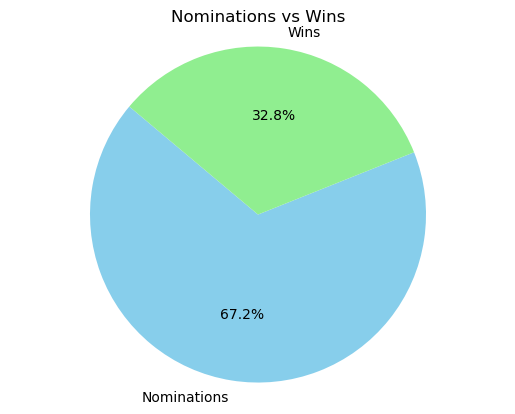

In [8]:
# Create a pie chart
plt.pie(pie_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Nominations vs Wins')
plt.show()

# Analysis of Review Sites

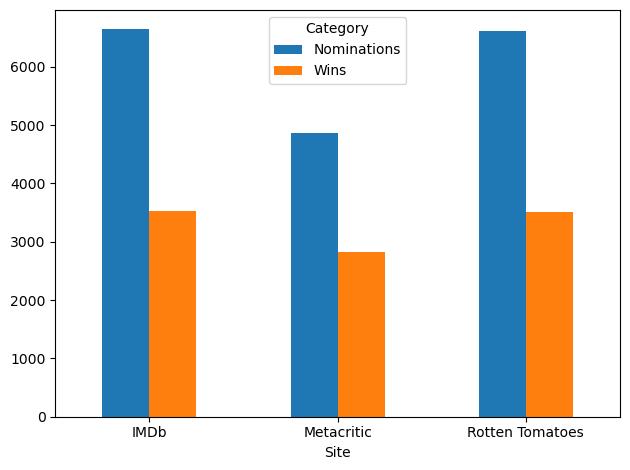

In [9]:
review_sites = ["IMDb", "Rotten Tomatoes", "Metacritic"]
noms_wins = []

for site in review_sites:
    noms_wins.append(movie_data_df.loc[movie_data_df[site] > 70, "Nominations"].sum())
    noms_wins.append(movie_data_df.loc[movie_data_df[site] > 70, "Wins"].sum())

labels = ["IMDb", "IMDb", "Rotten Tomatoes", "Rotten Tomatoes", "Metacritic", "Metacritic"]
cond = ["Nominations", "Wins", "Nominations", "Wins", "Nominations", "Wins"]

bar_df = pd.DataFrame({"Site": labels, "Category": cond, "Values": noms_wins})
bar_df.pivot(index='Site', columns='Category', values='Values').plot(kind='bar', rot=0)
plt.tight_layout()
plt.show()

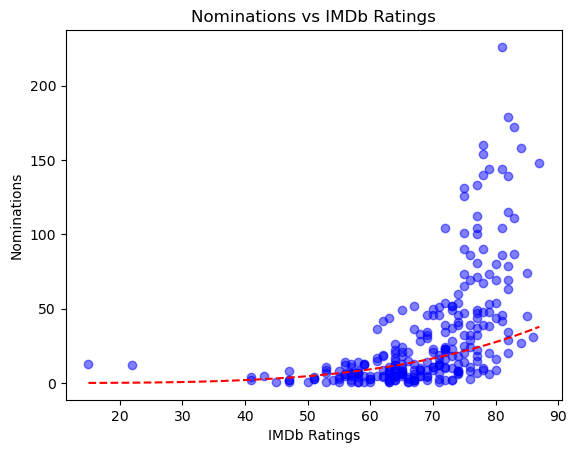

In [10]:
# Perform linear regression on the logarithmic data
x = movie_data_df['IMDb']
y = movie_data_df['Nominations']
log_x = np.log(x)
log_y = np.log(y)
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Create the scatter plot
plt.scatter(x, y, color='blue', alpha=0.5)
plt.ylabel('Nominations')
plt.xlabel('IMDb Ratings')
plt.title('Nominations vs IMDb Ratings')

# Plot the exponential regression line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = np.exp(slope * np.log(x_fit) + intercept)
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Exponential Regression Line')

/Users/villarroelvalentina/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/villarroelvalentina/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/var/folders/z1/1sbxvkbx0jjc2gfz5ytpg7g40000gn/T/ipykernel_29439/872411254.py:16: RuntimeWarning: divide by zero encountered in log
  y_fit = np.exp(slope * np.log(x_fit) + intercept)


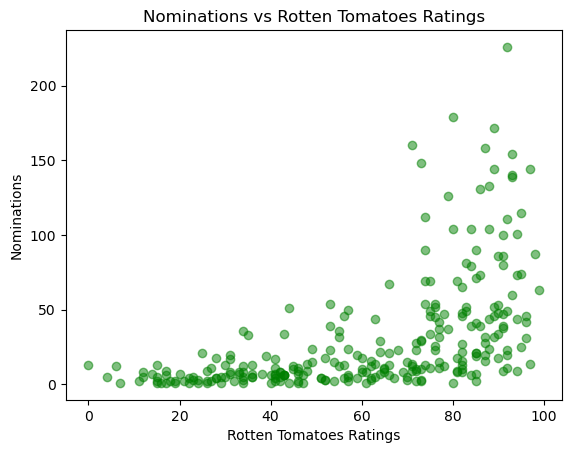

In [11]:
# Perform linear regression on the logarithmic data
x = movie_data_df['Rotten Tomatoes']
y = movie_data_df['Nominations']
log_x = np.log(x)
log_y = np.log(y)
slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

# Scatter plot for Rotten Tomatoes vs Nominations
plt.scatter(x, y, color='green', alpha=0.5)
plt.ylabel('Nominations')
plt.xlabel('Rotten Tomatoes Ratings')
plt.title('Nominations vs Rotten Tomatoes Ratings')

# Plot the exponential regression line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = np.exp(slope * np.log(x_fit) + intercept)
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Exponential Regression Line')

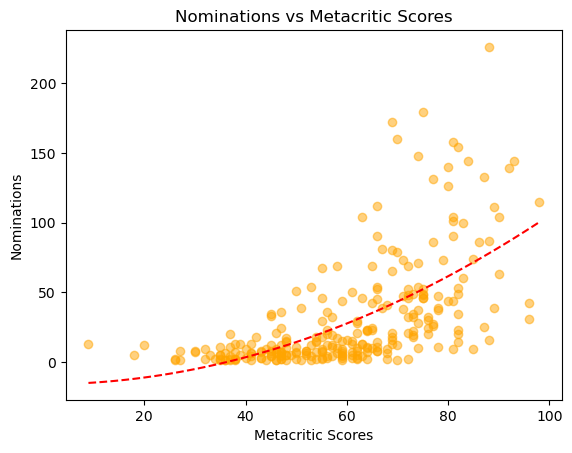

In [12]:
# Perform linear regression on the power-transformed data
x = movie_data_df['Metacritic']
y = movie_data_df['Nominations']
x_power = x ** 2  # Applying a power transformation (e.g., squared)
slope, intercept, r_value, p_value, std_err = linregress(x_power, y)

# Create the scatter plot
plt.scatter(x, y, color='orange', alpha=0.5)
plt.ylabel('Nominations')
plt.xlabel('Metacritic Scores')
plt.title('Nominations vs Metacritic Scores')

# Plot the power-transformed regression line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = slope * x_fit ** 2 + intercept
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Power-Transformed Regression Line')

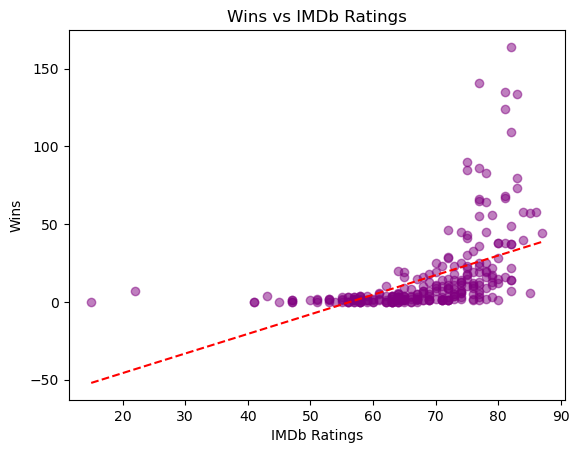

In [13]:
# Perform linear regression on the data
x = movie_data_df['IMDb']
y = movie_data_df['Wins']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the scatter plot
plt.scatter(x, y, color='purple', alpha=0.5)
plt.ylabel('Wins')
plt.xlabel('IMDb Ratings')
plt.title('Wins vs IMDb Ratings')

# Plot the linear regression line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Linear Regression Line')

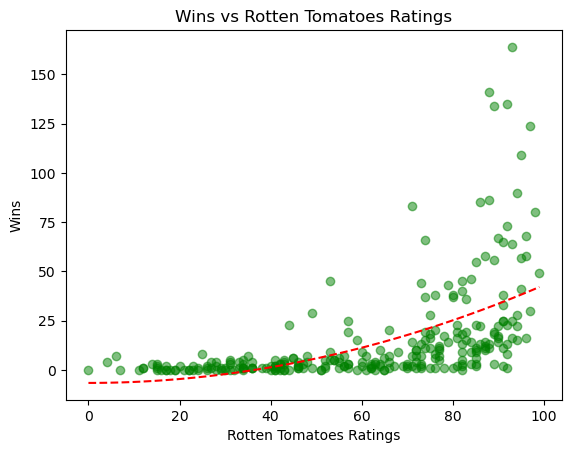

In [14]:
# Perform linear regression on the power-transformed data
x = movie_data_df['Rotten Tomatoes']
y = movie_data_df['Wins']
x_power = x ** 2  # Applying a power transformation (e.g., squared)
slope, intercept, r_value, p_value, std_err = linregress(x_power, y)

# Create the scatter plot
plt.scatter(x, y, color='green', alpha=0.5)
plt.ylabel('Wins')
plt.xlabel('Rotten Tomatoes Ratings')
plt.title('Wins vs Rotten Tomatoes Ratings')

# Plot the power-transformed regression line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = slope * x_fit ** 2 + intercept
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Power-Transformed Regression Line')

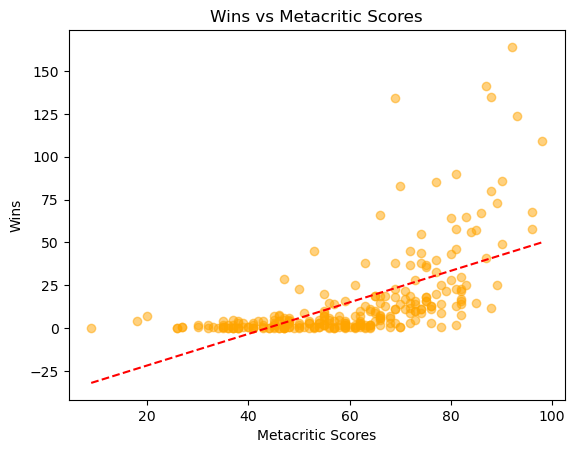

In [15]:
# Perform linear regression
x = movie_data_df['Metacritic']
y = movie_data_df['Wins']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the scatter plot
plt.scatter(x, y, color='orange', alpha=0.5)
plt.ylabel('Wins')
plt.xlabel('Metacritic Scores')
plt.title('Wins vs Metacritic Scores')

# Plot the linear regression line
x_fit = np.linspace(min(x), max(x), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='red', linestyle='--', label='Linear Regression Line')

# Analysis of Runtime

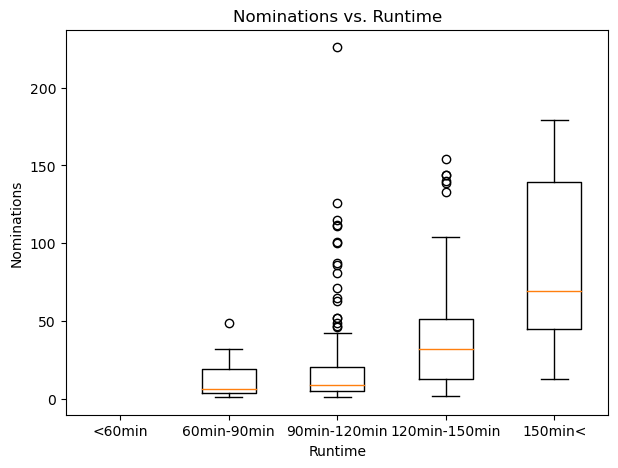

In [16]:
movie_lengths = [0, 60, 90, 120, 150]
length_labels = ["<60min", "60min-90min", "90min-120min", "120min-150min", "150min<"]
length_noms_data = []
length_wins_data = []
i = 0

for i in range(len(movie_lengths)):
    if i == (len(movie_lengths) - 1):
        length_noms_data.append(movie_data_df.loc[movie_data_df["Runtime"] > movie_lengths[i], "Nominations"])
        length_wins_data.append(movie_data_df.loc[movie_data_df["Runtime"] > movie_lengths[i], "Wins"])
    else:
        temp = movie_data_df.loc[movie_data_df["Runtime"] > movie_lengths[i]]
        length_noms_data.append(temp.loc[temp["Runtime"] < movie_lengths[i+1], "Nominations"])
        length_wins_data.append(temp.loc[temp["Runtime"] < movie_lengths[i+1], "Wins"])
    i += 1

plt_box = plt.figure(figsize = (7,5))
plt.boxplot(length_noms_data, labels=length_labels)
plt.xlabel("Runtime")
plt.ylabel("Nominations")
plt.title("Nominations vs. Runtime")
plt.show()

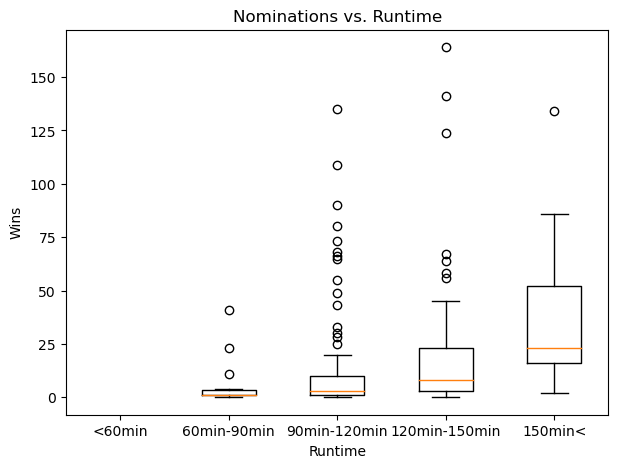

In [17]:
plt_box = plt.figure(figsize = (7,5))
plt.boxplot(length_wins_data, labels=length_labels)
plt.xlabel("Runtime")
plt.ylabel("Wins")
plt.title("Nominations vs. Runtime")
plt.show()

In [18]:
bins = [0,90,120,150,180,210]
labels = ['0 - 89', '90 - 119', '120 -149','150 - 179', '> 180']

In [19]:
movie_data_df['Runtime Bucket (mins)'] = pd.cut(movie_data_df['Runtime'],bins,labels=labels)
movie_data_df.head()

,ID,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins,Runtime Bucket (mins)
0,tt0381061,Casino Royale,2006,144,167445960.0,80,94,80,44,28,120 -149
1,tt0482571,The Prestige,2006,130,53089891.0,85,76,66,45,6,120 -149
2,tt1232829,21 Jump Street,2012,109,138447667.0,72,85,69,21,11,90 - 119
3,tt1853728,Django Unchained,2012,165,162805434.0,84,87,81,158,58,150 - 179
4,tt0993846,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37,150 - 179


/var/folders/z1/1sbxvkbx0jjc2gfz5ytpg7g40000gn/T/ipykernel_29439/1781383818.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  runtime_data = movie_data_df.groupby('Runtime Bucket (mins)').sum()['Wins']


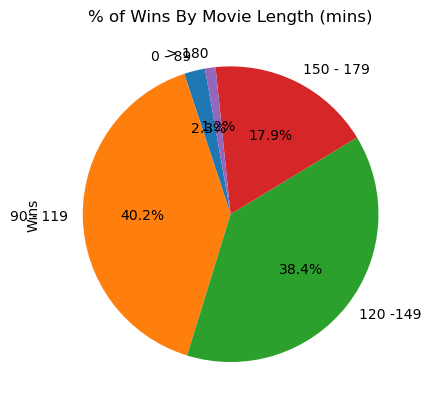

<bound method Series.info of Runtime Bucket (mins)
0 - 89         92
90 - 119     1605
120 -149     1536
150 - 179     717
> 180          46
Name: Wins, dtype: int64>

In [20]:
runtime_data = movie_data_df.groupby('Runtime Bucket (mins)').sum()['Wins']

runtime_data.plot(kind='pie',y='', autopct='%1.1f%%', startangle=100, shadow =False)
plt.title('% of Wins By Movie Length (mins)')
plt.show()

runtime_data.info

In [21]:
movie_data_df['Runtime Bucket (mins)'].value_counts()

90 - 119     152
120 -149      79
150 - 179     18
0 - 89        16
> 180          1
Name: Runtime Bucket (mins), dtype: int64

# Analysis of Box Office

In [22]:
box_office_bins = [0, 50000000, 100000000,  150000000, 200000000, 250000000, 300000000,350000000, 400000000, 450000000, 500000000]
box_office_labels = ["0 to 50", "50-100", "100-150", "150-200", "200-250",
                "250-300","300-350", "350-400", "400-450","450-500"]

In [23]:
movie_data_df['Box Office Groupings (millions)'] = pd.cut(movie_data_df['Box Office'],bins=box_office_bins, labels=box_office_labels)
movie_data_df.head()

,ID,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins,Runtime Bucket (mins),Box Office Groupings (millions)
0,tt0381061,Casino Royale,2006,144,167445960.0,80,94,80,44,28,120 -149,150-200
1,tt0482571,The Prestige,2006,130,53089891.0,85,76,66,45,6,120 -149,50-100
2,tt1232829,21 Jump Street,2012,109,138447667.0,72,85,69,21,11,90 - 119,100-150
3,tt1853728,Django Unchained,2012,165,162805434.0,84,87,81,158,58,150 - 179,150-200
4,tt0993846,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37,150 - 179,100-150


/var/folders/z1/1sbxvkbx0jjc2gfz5ytpg7g40000gn/T/ipykernel_29439/2497380678.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = movie_data_df.groupby('Box Office Groupings (millions)').sum()['Wins']


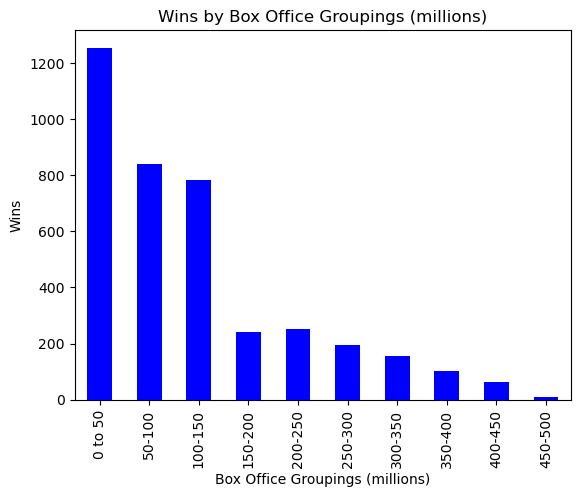

In [24]:
# x = movie_data_df["Box Office"]
#y = movie_data_df["Wins"]

#plt.bar(x, y, color="b", align="center")

# Group by 'Box Office Groupings (millions)' and sum the 'Wins'
grouped_data = movie_data_df.groupby('Box Office Groupings (millions)').sum()['Wins']

# Plot the aggregated data
grouped_data.plot(kind='bar', color='b', align='center')
plt.ylabel('Wins')
plt.title('Wins by Box Office Groupings (millions)')
plt.show()

In [25]:
# Group by 'Box Office Groupings (millions)' and sum the 'Wins'
grouped_data

Box Office Groupings (millions)
0 to 50    1255
50-100      841
100-150     784
150-200     241
200-250     251
250-300     193
300-350     155
350-400     103
400-450      63
450-500       8
Name: Wins, dtype: int64

In [26]:
movie_data_df.dtypes

ID                                   object
Title                                object
Year                                 object
Runtime                               int64
Box Office                          float64
IMDb                                  int64
Rotten Tomatoes                       int64
Metacritic                            int64
Nominations                           int64
Wins                                  int64
Runtime Bucket (mins)              category
Box Office Groupings (millions)    category
dtype: object

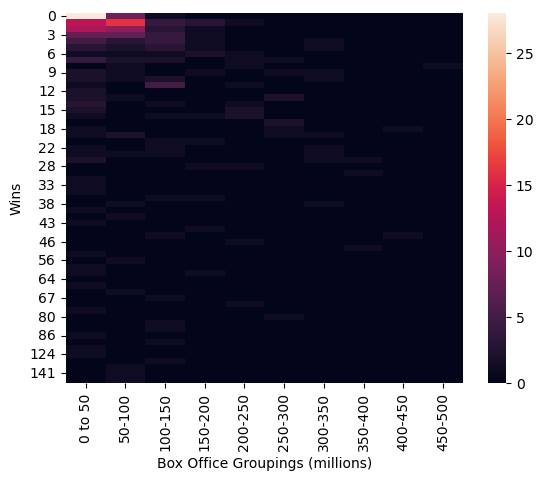

In [27]:
hm = sn.heatmap(movie_data_df.groupby(['Box Office Groupings (millions)','Wins'])
                .size()
                .unstack(level=0))

In [28]:
box_office_bins = [0, 50000000, 100000000,150000000, 200000000, 250000000, 300000000,350000000, 400000000, 450000000, 500000000]
box_office_labels = ["0 to 50", "50-100", "100- 150", "150-200", "200-250","250-300","300-350", "350-400", "400-450","450-500"]

movie_data_df['Box Office Income (millions)'] = pd.cut(movie_data_df['Box Office'],box_office_bins,labels=box_office_labels)

movie_data_df.head()

,ID,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins,Runtime Bucket (mins),Box Office Groupings (millions),Box Office Income (millions)
0,tt0381061,Casino Royale,2006,144,167445960.0,80,94,80,44,28,120 -149,150-200,150-200
1,tt0482571,The Prestige,2006,130,53089891.0,85,76,66,45,6,120 -149,50-100,50-100
2,tt1232829,21 Jump Street,2012,109,138447667.0,72,85,69,21,11,90 - 119,100-150,100- 150
3,tt1853728,Django Unchained,2012,165,162805434.0,84,87,81,158,58,150 - 179,150-200,150-200
4,tt0993846,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37,150 - 179,100-150,100- 150
